# EE 399 SPRING QUATER 2023
# HOMEWORK #2:
# Instructor: J. Nathan Kutz

###  A

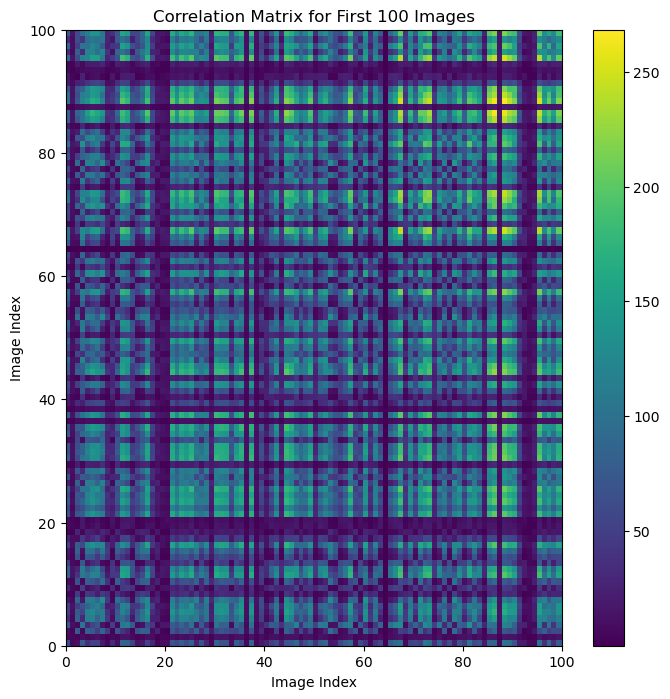

In [42]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.linalg import eigh

results = loadmat('yalefaces.mat')
X = results['X'][:, :100]  # take first 100 columns of X

C = np.dot(X.T, X)  # compute correlation matrix

# plot correlation matrix using pcolor
plt.figure(figsize=(8, 8))
plt.pcolor(C)
plt.colorbar()
plt.title('Correlation Matrix for First 100 Images')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()



### B

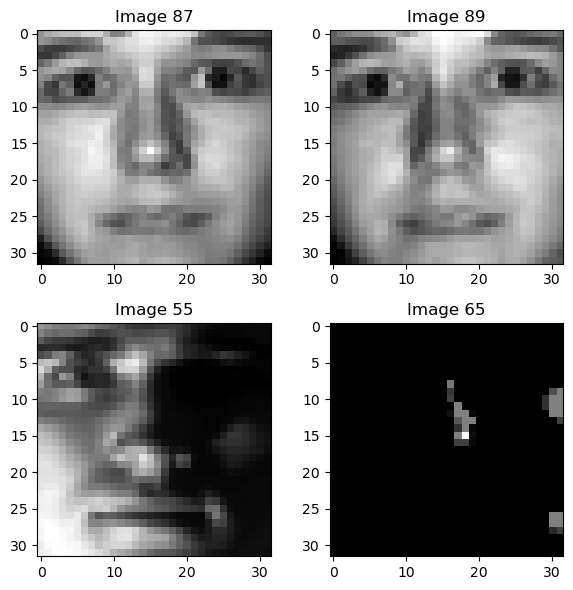

In [43]:
# find indices of maximum and minimum correlation values
max_idx = np.unravel_index(np.argmax(C - np.eye(C.shape[0])*np.max(C)), C.shape)
min_idx = np.unravel_index(np.argmin(C + np.eye(C.shape[0])*np.max(C)), C.shape)

# extract corresponding columns from X
max_img1, max_img2 = X[:, max_idx[0]], X[:, max_idx[1]]
min_img1, min_img2 = X[:, min_idx[0]], X[:, min_idx[1]]

# plot the images
fig, ax = plt.subplots(2, 2, figsize=(6, 6))
ax[0, 0].imshow(max_img1.reshape(32, 32), cmap='gray')
ax[0, 0].set_title('Image {}'.format(max_idx[0] + 1))

ax[0, 1].imshow(max_img2.reshape(32, 32), cmap='gray')
ax[0, 1].set_title('Image {}'.format(max_idx[1] + 1))

ax[1, 0].imshow(min_img1.reshape(32, 32), cmap='gray')
ax[1, 0].set_title('Image {}'.format(min_idx[0] + 1))

ax[1, 1].imshow(min_img2.reshape(32, 32), cmap='gray')
ax[1, 1].set_title('Image {}'.format(min_idx[1] + 1))
plt.tight_layout()
plt.show()


### C

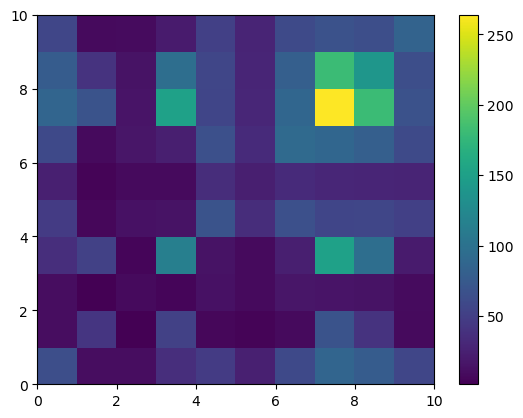

In [61]:
results = loadmat('yalefaces.mat')
X = results['X']

# specify indices
idx = [0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]

# extract columns from X
X_sub = X[:, idx]

# compute correlation matrix
C_sub = np.dot(X_sub.T, X_sub)

# plot correlation matrix

plt.pcolor(C_sub)
plt.colorbar()
plt.show()


### D

In [62]:

Y = np.dot(X.T, X)

eig_vals, eig_vecs = eigh(Y)

idx = np.argsort(eig_vals)[::-1]

eig_vecs_nor = eig_vecs[:, idx[:6]]

eig_vecs_sub = eig_vecs_nor / np.linalg.norm (eig_vecs_nor, axis = 0)
print(eig_vecs_sub)

[[-0.01219331  0.01938848 -0.01691206  0.0204079  -0.01902342  0.0090084 ]
 [-0.00215188  0.00195186 -0.00143586 -0.01201431  0.00418948  0.00624237]
 [-0.01056679 -0.02471869 -0.0384465   0.00397553  0.0384026  -0.01580824]
 ...
 [-0.02177117 -0.04027773 -0.01340245 -0.01641295 -0.01092512  0.00977639]
 [-0.03015309 -0.00219562  0.01883373 -0.04011563  0.00087341 -0.00090316]
 [-0.0257889  -0.01553129 -0.00643709  0.02679029  0.01260435 -0.00304479]]


### E

In [69]:
U, S, Vt = np.linalg.svd(X)
PC_sub = Vt[:6, :]
PC_sub = PC_sub.T
print(PC_sub)

[[-0.01219331 -0.01938848  0.01691206  0.0204079  -0.01902342 -0.0090084 ]
 [-0.00215188 -0.00195186  0.00143586 -0.01201431  0.00418948 -0.00624237]
 [-0.01056679  0.02471869  0.0384465   0.00397553  0.0384026   0.01580824]
 ...
 [-0.02177117  0.04027773  0.01340245 -0.01641295 -0.01092512 -0.00977639]
 [-0.03015309  0.00219562 -0.01883373 -0.04011563  0.00087341  0.00090316]
 [-0.0257889   0.01553129  0.00643709  0.02679029  0.01260435  0.00304479]]


### F

In [68]:
# Extract the first eigenvector from V and the first column from U
v1 = eig_vecs_sub[:, 0]
u1 = PC_sub[:, 0]

# Compute the norm of the difference of their absolute values
diff_norm = np.linalg.norm(np.abs(v1) - np.abs(u1))


print("Norm of difference between v1 and u1:", diff_norm)


Norm of difference between v1 and u1: 5.093466237929092e-16


### G

Percentage of variance captured by each mode:
Mode 1: 72.93%
Mode 2: 15.28%
Mode 3: 2.57%
Mode 4: 1.88%
Mode 5: 0.64%
Mode 6: 0.59%


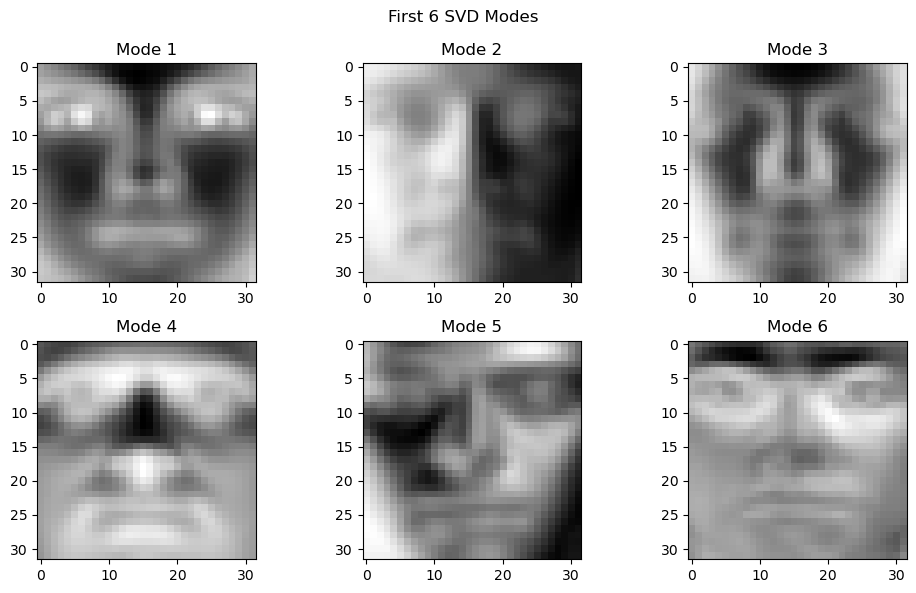

In [72]:
# Compute the percentage of variance captured by each mode
variance_explained = (S ** 2) / np.sum(S ** 2)
cumulative_variance = np.cumsum(variance_explained)

print("Percentage of variance captured by each mode:")
for i in range(6):
    print("Mode {}: {:.2%}".format(i+1, variance_explained[i]))

# Plot the first 6 SVD modes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(U[:,i].reshape((32, 32)), cmap='gray')
    ax.set_title("Mode {}".format(i+1))
plt.suptitle("First 6 SVD Modes")
plt.tight_layout()
plt.show()